<a href="https://colab.research.google.com/github/Isaac0123/CS418Final/blob/main/CS418Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import math
import csv
import datetime


forests = pd.read_csv('forests.csv')
forests.columns = forests.iloc[0]
forests = forests[1:]
forests = forests.reset_index(drop=True)
forests

emissions = pd.read_csv('CO2 emission by countries.csv',encoding='latin1')
emissionsMain = emissions[['Country','Year','CO2 emission (Tons)']]

emissionsMain = emissionsMain[(emissionsMain.Country =="Brazil")]
emissionsMain = emissionsMain[(emissionsMain.Year > 1987)]
dataframes = [forests,emissionsMain.reset_index()]

final = pd.concat(dataframes,axis = 1)
final = final.drop(columns=['Year'])
final = final.drop(columns=['index'])
final = final.drop(columns=['Country'])
final = final.drop(final.tail(2).index)
final

,Year/States,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL,CO2 emission (Tons)
0,1988,620,1510,60,2450,5140,6990,2340,290,1650,21050,4.219243e+09
1,1989,540,1180,130,1420,5960,5750,1430,630,730,17770,4.431374e+09
2,1990,550,520,250,1100,4020,4890,1670,150,580,13730,4.650032e+09
3,1991,380,980,410,670,2840,3780,1110,420,440,11030,4.879426e+09
4,1992,400,799,36,1135,4674,3787,2265,281,409,13786,5.113027e+09
5,1993,482,370,0,372,6220,4284,2595,240,333,14896,5.357333e+09
6,1994,482,370,0,372,6220,4284,2595,240,333,14896,5.611335e+09
7,1995,1208,2114,9,1745,10391,7845,4730,220,797,29059,5.880013e+09
8,1996,433,1023,0,1061,6543,6135,2432,214,320,18161,6.169324e+09
9,1997,358,589,18,409,5271,4139,1986,184,273,13227,6.476273e+09


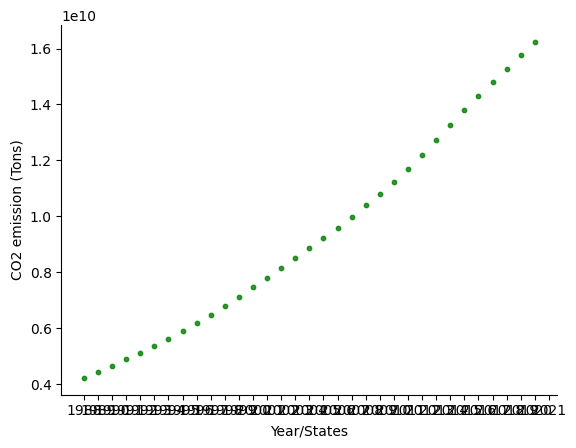

In [89]:
from matplotlib import pyplot as plt
df_2.plot(kind='scatter', x='Year/States', y='CO2 emission (Tons)', s=32, alpha=.8,color = 'green')
#change xtick interval frequency
plt.gca().spines[['top', 'right',]].set_visible(False)

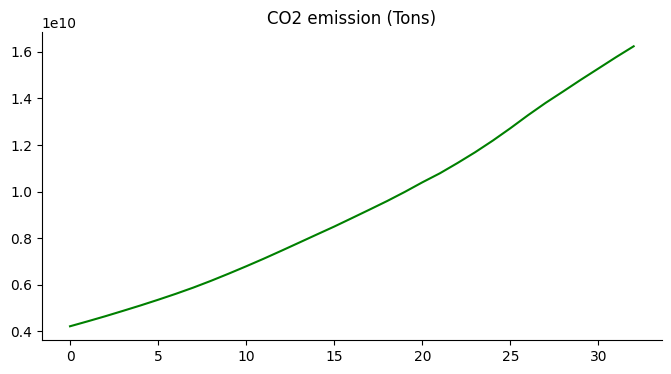

In [ ]:
from matplotlib import pyplot as plt
final['CO2 emission (Tons)'].plot(kind='line', figsize=(8, 4), title='CO2 emission (Tons)',color = 'green')
plt.gca().spines[['top', 'right']].set_visible(False)

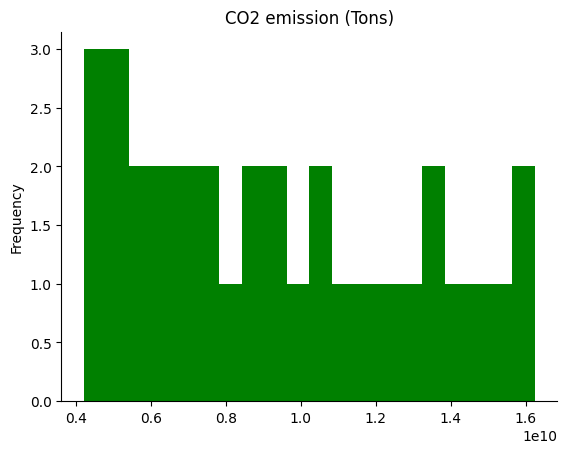

In [ ]:
from matplotlib import pyplot as plt
final['CO2 emission (Tons)'].plot(kind='hist', bins=20, title='CO2 emission (Tons)',color = 'green')
plt.gca().spines[['top', 'right',]].set_visible(False)